In [185]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

# **Exercise: Data Preparation**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Encoding
- Scaling
<br><br>

**Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

**Lakukan tahapan ini pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk encoding.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan fitting model dan evaluasi dengan metode Lasso pada data yang telah dilakukan preprocessing.

Keterangan features:
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

---

# Overview

**Goal:** Menggunakan model Lasso untuk melakukan prediksi harga rumah di Melbourne.

# 1. Import Libraries & Load Dataset

In [186]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [227]:
#ML Library

#ML Models
from sklearn.linear_model import Lasso
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#ML Encoding
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
#ML Report
from sklearn.metrics import  accuracy_score, mean_squared_error

In [188]:
#Pandas Columns setting display = 100
pd.set_option('display.max_columns', 100)

In [189]:
#Load dataset

house = pd.read_csv('melb_data.csv')

In [190]:
#Construct deep Info on columns & values:

houseinfo = []
for i in house.columns:
    houseinfo.append([i, house[i].dtypes,
                      house[i].isna().sum(),
                      round((((house[i].isna().sum())/(len(house)))*100),2), 
                    house[i].nunique(), 
                    house[i].sample(3).values])
pd.DataFrame(houseinfo, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Suburb,object,0,0.00,314,"[Diamond Creek, Aberfeldie, Glen Iris]"
1,Address,object,0,0.00,13378,"[27 McMahons Rd, 2/442 Bluff Rd, 11 Spring St]"
2,Rooms,int64,0,0.00,9,"[4, 3, 2]"
3,Type,object,0,0.00,3,"[u, u, u]"
4,Price,float64,0,0.00,2204,"[1910000.0, 683000.0, 865000.0]"
5,Method,object,0,0.00,5,"[PI, S, S]"
6,SellerG,object,0,0.00,268,"[Rendina, Jellis, Buxton]"
7,Date,object,0,0.00,58,"[13/05/2017, 26/08/2017, 24/06/2017]"
8,Distance,float64,0,0.00,202,"[5.2, 3.3, 4.6]"
9,Postcode,float64,0,0.00,198,"[3083.0, 3163.0, 3031.0]"


# 2. Data Cleaning & Preprocessing

## 2.1 Feature / Columns Selection

In [191]:
#Memilih kolom yang akan digunakan
columns = ['Price', 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname']

In [192]:
#Update datafram dengan menyeleksi kolom
house = house[columns]  
house.head()

,Price,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,1480000.0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan
1,1035000.0,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan
2,1465000.0,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan
3,850000.0,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan
4,1600000.0,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan


In [193]:
#Construct deep Info on columns & values:

houseinfo = []
for i in house.columns:
    houseinfo.append([i, house[i].dtypes,
                      house[i].isna().sum(),
                      round((((house[i].isna().sum())/(len(house)))*100),2), 
                    house[i].nunique(), 
                    house[i].sample(3).values])
pd.DataFrame(houseinfo, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Price,float64,0,0.00,2204,"[821000.0, 610000.0, 810000.0]"
1,Suburb,object,0,0.00,314,"[Mordialloc, Richmond, Fitzroy]"
2,Rooms,int64,0,0.00,9,"[4, 5, 3]"
3,Type,object,0,0.00,3,"[h, h, u]"
4,Method,object,0,0.00,5,"[SP, S, SP]"
5,Distance,float64,0,0.00,202,"[15.2, 7.0, 1.6]"
6,Bedroom2,float64,0,0.00,12,"[4.0, 2.0, 3.0]"
7,Bathroom,float64,0,0.00,9,"[1.0, 2.0, 1.0]"
8,Car,float64,62,0.46,11,"[2.0, 2.0, 1.0]"
9,Landsize,float64,0,0.00,1448,"[186.0, 628.0, 950.0]"


## 2.2 Data Cleaning

### 2.2.1 Handling Duplicate Data

In [194]:
house.duplicated().sum()

20

In [195]:
house.drop_duplicates(inplace=True)

In [196]:
house.duplicated().sum()

0

### 2.2.2 Handling Missing Values

In [197]:
house.isna().sum()

Price              0
Suburb             0
Rooms              0
Type               0
Method             0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6445
YearBuilt       5371
CouncilArea     1367
Regionname         0
dtype: int64

In [198]:
house.dropna(inplace=True)

In [199]:
house.reset_index(drop=True, inplace=True)

### 2.2.3 Outlier Handling

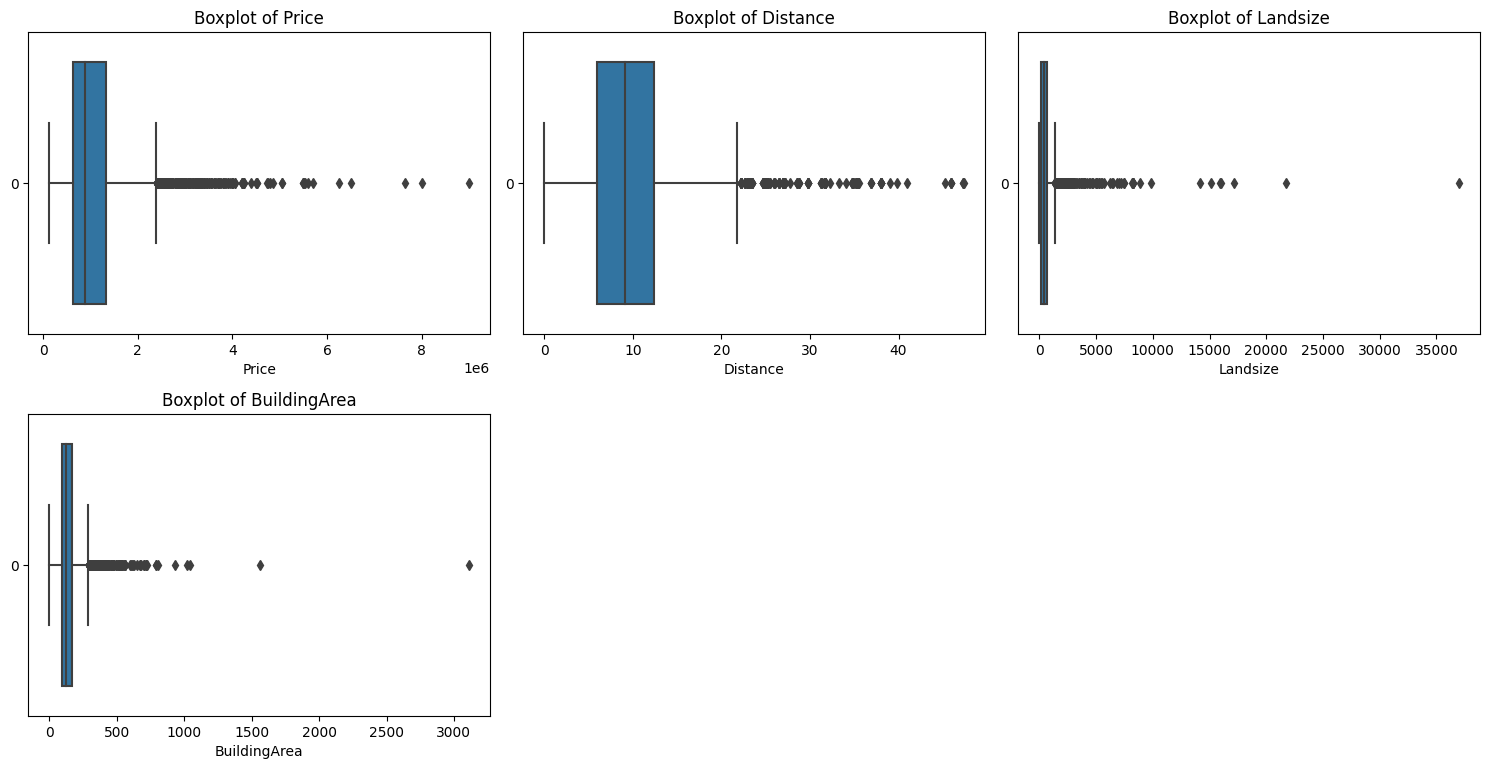

In [200]:
numerical_cols = ['Price', 'Distance', 'Landsize', 'BuildingArea']

#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=house[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

Ditemukan extreme outlier pada kolom Landsixe & Building area, maka kita akan drop outlier tersebut.

In [201]:
#Find outlier on BuildingArea
house[house['BuildingArea'] > 10000]

,Price,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname


Meskipun datanya valid, namun akan kita drop agar tidak memberikan dampak terlalu besar pada model.

In [202]:
#Drop outlier on BuildingArea
house = house[house['BuildingArea'] < 10000]

In [203]:
house.reset_index(drop=True, inplace=True)

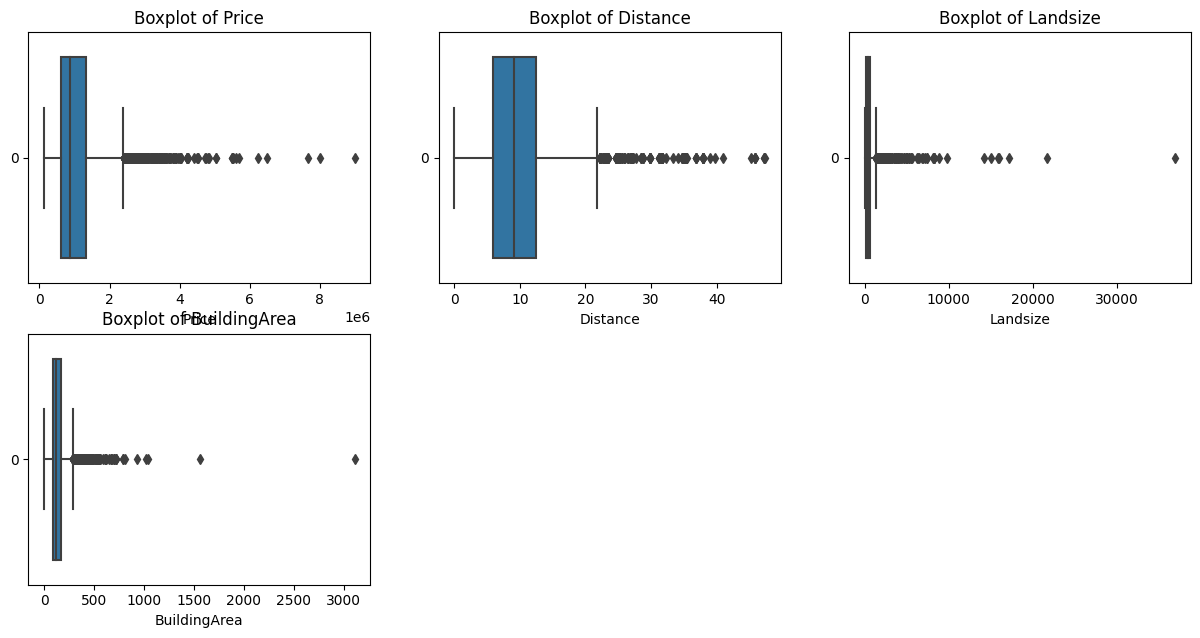

In [204]:
#Plotting boxplot for numerical values
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=house[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# 3. Feature Engineering

## 3.1 Encoding

- Gunakan ColumnTransformer untuk encoding.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.

In [205]:
#Kolom categorical yang akan digunakan
categorical_columns = ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']

In [206]:
house[categorical_columns]

,Suburb,Type,Method,CouncilArea,Regionname
0,Abbotsford,h,S,Yarra,Northern Metropolitan
1,Abbotsford,h,SP,Yarra,Northern Metropolitan
2,Abbotsford,h,VB,Yarra,Northern Metropolitan
3,Abbotsford,h,S,Yarra,Northern Metropolitan
4,Abbotsford,h,S,Yarra,Northern Metropolitan
...,...,...,...,...,...
6177,Whittlesea,h,S,Whittlesea,Northern Victoria
6178,Williamstown,h,VB,Hobsons Bay,Western Metropolitan
6179,Williamstown,u,SP,Hobsons Bay,Western Metropolitan
6180,Windsor,u,PI,Stonnington,Southern Metropolitan


| Method | Desc |
| :--- | :--- |
| S | - property sold;
| SP | - property sold prior; 
| PI | - property passed in; 
| PN | - sold prior not disclosed; 
| SN | - sold not disclosed; 
| NB | - no bid; 
| VB | - vendor bid; 
| W | - withdrawn prior to auction; 
| SA | - sold after auction; 
| SS | - sold after auction price not disclosed. 
| N/A | - price or highest bid not available.

In [207]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### 3.1.1 Encoder Mapping

In [208]:
binary_encoder = ce.BinaryEncoder(cols = categorical_columns)
house_bin_encoded = binary_encoder.fit_transform(house[categorical_columns])
house_bin_encoded


,Suburb_0,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,Suburb_8,Type_0,Type_1,Method_0,Method_1,Method_2,CouncilArea_0,CouncilArea_1,CouncilArea_2,CouncilArea_3,CouncilArea_4,Regionname_0,Regionname_1,Regionname_2,Regionname_3
0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,1,0,0,0,1,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0
6178,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0
6179,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
6180,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1


In [209]:
transformer = ColumnTransformer([('OneHotEncoder', OneHotEncoder(drop='first'), ['Type']),
                                 ('binary encoder',ce.BinaryEncoder(),categorical_columns),
                                 ('robust scaler',RobustScaler(),numerical_cols)
                                ], remainder = 'passthrough')

In [210]:
house

,Price,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,1035000.0,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.00,1900.0,Yarra,Northern Metropolitan
1,1465000.0,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.00,1900.0,Yarra,Northern Metropolitan
2,1600000.0,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.00,2014.0,Yarra,Northern Metropolitan
3,1876000.0,Abbotsford,3,h,S,2.5,4.0,2.0,0.0,245.0,210.00,1910.0,Yarra,Northern Metropolitan
4,1636000.0,Abbotsford,2,h,S,2.5,2.0,1.0,2.0,256.0,107.00,1890.0,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,601000.0,Whittlesea,3,h,S,35.5,3.0,2.0,1.0,972.0,149.00,1996.0,Whittlesea,Northern Victoria
6178,1050000.0,Williamstown,3,h,VB,6.8,3.0,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,Western Metropolitan
6179,385000.0,Williamstown,1,u,SP,6.8,1.0,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,Western Metropolitan
6180,560000.0,Windsor,2,u,PI,4.6,2.0,1.0,1.0,0.0,61.60,2012.0,Stonnington,Southern Metropolitan


## 3.2 Data Preprocessing

### 3.2.1 Train Test Split

In [211]:
#Selcting y & x
x = house.drop(columns = ['Price'])
y = house['Price']

In [212]:
#Numerical & Categorical
numerical_cols = ['Rooms','Distance','Bedroom2' ,'Bathroom','Car', 'Landsize', 'BuildingArea', 'YearBuilt']
categorical_columns = ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 2020)

In [214]:
house

,Price,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,1035000.0,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.00,1900.0,Yarra,Northern Metropolitan
1,1465000.0,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.00,1900.0,Yarra,Northern Metropolitan
2,1600000.0,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.00,2014.0,Yarra,Northern Metropolitan
3,1876000.0,Abbotsford,3,h,S,2.5,4.0,2.0,0.0,245.0,210.00,1910.0,Yarra,Northern Metropolitan
4,1636000.0,Abbotsford,2,h,S,2.5,2.0,1.0,2.0,256.0,107.00,1890.0,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,601000.0,Whittlesea,3,h,S,35.5,3.0,2.0,1.0,972.0,149.00,1996.0,Whittlesea,Northern Victoria
6178,1050000.0,Williamstown,3,h,VB,6.8,3.0,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,Western Metropolitan
6179,385000.0,Williamstown,1,u,SP,6.8,1.0,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,Western Metropolitan
6180,560000.0,Windsor,2,u,PI,4.6,2.0,1.0,1.0,0.0,61.60,2012.0,Stonnington,Southern Metropolitan


In [215]:
x_train

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
1590,Glen Iris,5,h,VB,9.2,5.0,3.0,2.0,709.0,672.0,1930.0,Boroondara,Southern Metropolitan
4786,Malvern East,3,h,S,8.4,3.0,2.0,2.0,580.0,146.0,1930.0,Stonnington,Southern Metropolitan
3417,Thornbury,1,u,SP,6.5,1.0,1.0,1.0,0.0,41.0,1970.0,Darebin,Northern Metropolitan
1414,Fitzroy,1,u,S,1.6,1.0,1.0,1.0,782.0,42.0,1975.0,Yarra,Northern Metropolitan
2199,Middle Park,2,u,S,4.1,2.0,1.0,1.0,760.0,58.0,1930.0,Port Phillip,Southern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,Hadfield,2,u,SP,12.1,2.0,1.0,2.0,198.0,96.0,2010.0,Moreland,Northern Metropolitan
2139,Maribyrnong,3,h,S,8.7,3.0,1.0,4.0,762.0,142.0,1950.0,Maribyrnong,Western Metropolitan
3779,Heidelberg,3,t,PI,10.6,2.0,1.0,2.0,235.0,123.0,1990.0,Banyule,Eastern Metropolitan
4488,Albion,3,h,S,13.9,4.0,2.0,5.0,689.0,128.0,1951.0,Brimbank,Western Metropolitan


### 3.2.2 Data Transformation

In [216]:
transformer = ColumnTransformer([('OneHotEncoder', OneHotEncoder(drop='first'), ['Type']),
                                 ('binary encoder',ce.BinaryEncoder(),categorical_columns),
                                 ('robust scaler',RobustScaler(),numerical_cols)
                                ], remainder = 'passthrough')

In [217]:

x_train_preprocessed = transformer.fit_transform(x_train)
x_test_preprocessed = transformer.transform(x_test)

In [218]:
x_train_preprocessed

array([[ 0.        ,  0.        ,  0.        , ...,  0.69432773,
         6.94936709, -0.66666667],
       [ 0.        ,  0.        ,  0.        , ...,  0.42331933,
         0.29113924, -0.66666667],
       [ 0.        ,  1.        ,  0.        , ..., -0.79516807,
        -1.03797468,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.30147059,
         0.        ,  0.33333333],
       [ 0.        ,  0.        ,  0.        , ...,  0.65231092,
         0.06329114, -0.31666667],
       [ 0.        ,  0.        ,  0.        , ...,  0.09558824,
        -0.35443038, -0.66666667]])

In [219]:
x_train_preprocessed = pd.DataFrame(x_train_preprocessed)
x_test_preprocessed = pd.DataFrame(x_test_preprocessed)
x_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.030769,2.0,2.0,1.0,0.694328,6.949367,-0.666667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.092308,0.0,1.0,1.0,0.423319,0.291139,-0.666667
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-0.384615,-2.0,0.0,0.0,-0.795168,-1.037975,0.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.138462,-2.0,0.0,0.0,0.847689,-1.025316,0.083333
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.5,-0.753846,-1.0,0.0,0.0,0.801471,-0.822785,-0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.5,0.476923,-1.0,0.0,1.0,-0.379202,-0.341772,0.666667
4632,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.046154,0.0,0.0,3.0,0.805672,0.240506,-0.333333
4633,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.246154,-1.0,0.0,1.0,-0.301471,0.000000,0.333333
4634,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.753846,1.0,1.0,4.0,0.652311,0.063291,-0.316667


In [220]:
x_train.isna().sum()

Suburb          0
Rooms           0
Type            0
Method          0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
dtype: int64

In [221]:
#Obtain feature names
transformer.transformers_

[('OneHotEncoder', OneHotEncoder(drop='first'), ['Type']),
 ('binary encoder',
  BinaryEncoder(cols=['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname'],
                mapping=[{'col': 'Suburb',
                          'mapping':       Suburb_0  Suburb_1  Suburb_2  Suburb_3  Suburb_4  Suburb_5  Suburb_6  \
   1           0         0         0         0         0         0         0   
   2           0         0         0         0         0         0         0   
   3           0         0         0         0         0         0         0   
   4           0         0         0         0         0         0         1   
   5           0         0         0         0         0         0         1   
  ...        ...       ...       ...       ...       ...       ...       ...   
   275         1         0         0         0         1         0         0   
   276         1         0         0         0         1         0         1   
   277         1         0         0       

In [222]:
#Extrac feature names
transformer.transformers_[1][1].get_feature_names_out()

array(['Suburb_0', 'Suburb_1', 'Suburb_2', 'Suburb_3', 'Suburb_4',
       'Suburb_5', 'Suburb_6', 'Suburb_7', 'Suburb_8', 'Type_0', 'Type_1',
       'Method_0', 'Method_1', 'Method_2', 'CouncilArea_0',
       'CouncilArea_1', 'CouncilArea_2', 'CouncilArea_3', 'CouncilArea_4',
       'Regionname_0', 'Regionname_1', 'Regionname_2', 'Regionname_3'],
      dtype=object)

In [223]:
list(transformer.transformers_[1][1].get_feature_names_out())

['Suburb_0',
 'Suburb_1',
 'Suburb_2',
 'Suburb_3',
 'Suburb_4',
 'Suburb_5',
 'Suburb_6',
 'Suburb_7',
 'Suburb_8',
 'Type_0',
 'Type_1',
 'Method_0',
 'Method_1',
 'Method_2',
 'CouncilArea_0',
 'CouncilArea_1',
 'CouncilArea_2',
 'CouncilArea_3',
 'CouncilArea_4',
 'Regionname_0',
 'Regionname_1',
 'Regionname_2',
 'Regionname_3']

transformer = ColumnTransformer([('OneHotEncoder', OneHotEncoder(drop='first'), ['Type']),
                                 ('binary encoder',ce.BinaryEncoder(),categorical_columns),
                                 ('robust scaler',RobustScaler(),numerical_cols)
                                ], remainder = 'passthrough')

In [224]:
#Rename feature names column
features = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + numerical_cols
x_train_preprocessed.columns = features
x_test_preprocessed.columns = features
x_train_preprocessed

,Type_t,Type_u,Suburb_0,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,Suburb_8,Type_0,Type_1,Method_0,Method_1,Method_2,CouncilArea_0,CouncilArea_1,CouncilArea_2,CouncilArea_3,CouncilArea_4,Regionname_0,Regionname_1,Regionname_2,Regionname_3,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.030769,2.0,2.0,1.0,0.694328,6.949367,-0.666667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.092308,0.0,1.0,1.0,0.423319,0.291139,-0.666667
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-0.384615,-2.0,0.0,0.0,-0.795168,-1.037975,0.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.138462,-2.0,0.0,0.0,0.847689,-1.025316,0.083333
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.5,-0.753846,-1.0,0.0,0.0,0.801471,-0.822785,-0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.5,0.476923,-1.0,0.0,1.0,-0.379202,-0.341772,0.666667
4632,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.046154,0.0,0.0,3.0,0.805672,0.240506,-0.333333
4633,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.246154,-1.0,0.0,1.0,-0.301471,0.000000,0.333333
4634,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.753846,1.0,1.0,4.0,0.652311,0.063291,-0.316667


In [225]:
x_train_preprocessed.dropna(inplace=True)

# 4. Model Fitting & Evaluation

## 4.1 Model Fitting

In [226]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_preprocessed, y_train)

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.672e+12, tolerance: 2.010e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [231]:
mse_test = mean_squared_error(y_test, lasso.predict(x_test_preprocessed))
rmse_test = mean_squared_error(y_test, lasso.predict(x_test_preprocessed))**0.5

In [234]:
print(f"MSE test : {mse_test}, \nRMSE test : {rmse_test}")

MSE test : 198304261829.92206, 
RMSE test : 445313.66678996285
